In [34]:
#━━━━━━━━━❮Bibliotecas❯━━━━━━━━━
import os # sistema operacional
import cv2     # visao computacional
import math 
import geocoder
import requests
%matplotlib inline
import pandas as pd
from twilio.rest import Client
from geopy.geocoders import Nominatim
from keras.preprocessing import image   # pre processamento de imagens
import numpy as np   
from keras.utils import np_utils
from matplotlib import pyplot as plt 
from skimage.transform import resize   # redimensionamento de imagens
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split  # treino e teste split
from keras.models import Sequential
from keras.applications.vgg16 import VGG16 # modelo de rede neural
from keras.layers import Dense, InputLayer, Dropout
#━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━

In [76]:
count = 0
videoFile = "Accidents.mp4"
cap = cv2.VideoCapture(videoFile)   # lendo o video pelo caminho
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #frame atual
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="%d.jpg" % count;count+=1
        
        cv2.imwrite(filename, frame)
cap.release()
print ("Feito!")

Feito!


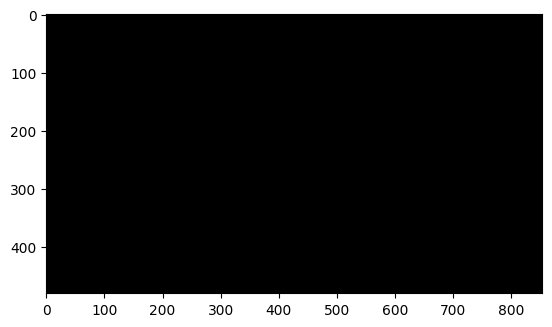

In [77]:
img = plt.imread('0.jpg')   # lendo imagem
plt.imshow(img)

In [78]:
data = pd.read_csv('mapping.csv')     # leitura do csv
data.head()

,Image_ID,Class
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [79]:
X = [ ]     # array vazio
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # alocando cada imagem no array X
X = np.array(X)    # convertendo lista para array

In [80]:
y = data.Class
dummy_y = np_utils.to_categorical(y)

In [81]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # remodelando para 224*224*3
    image.append(a)
X = np.array(image)

In [82]:
X = preprocess_input(X,data_format=None)

In [83]:
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [84]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

In [85]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

3/3 [==============================] - 5s 1s/step


((155, 7, 7, 512), (67, 7, 7, 512))

In [86]:
X_train = X_train.reshape(155, 7*7*512)      # convertendo para 1-D
X_valid = X_valid.reshape(67, 7*7*512)

In [87]:
train = X_train/X_train.max()      # centralizando dados
X_valid = X_valid/X_train.max()

In [88]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(2, activation='softmax'))    # output layer

In [89]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_5 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
5/5 [==============================] - 3s 443ms/step - loss: 0.6896 - accuracy: 0.6258 - val_loss: 0.8311 - val_accuracy: 0.6119
Epoch 2/100
5/5 [==============================] - 2s 390ms/step - loss: 0.3017 - accuracy: 0.8968 - val_loss: 0.9009 - val_accuracy: 0.7015
Epoch 3/100
5/5 [==============================] - 2s 414ms/step - loss: 0.2148 - accuracy: 0.9355 - val_loss: 0.8374 - val_accuracy: 0.7910
Epoch 4/100
5/5 [==============================] - 2s 385ms/step - loss: 0.1080 - accuracy: 0.9742 - val_loss: 0.8756 - val_accuracy: 0.7313
Epoch 5/100
5/5 [==============================] - 2s 400ms/step - loss: 0.0783 - accuracy: 0.9806 - val_loss: 0.9017 - val_accuracy: 0.7463
Epoch 6/100
5/5 [==============================] - 2s 349ms/step - loss: 0.0488 - accuracy: 0.9935 - val_loss: 0.9020 - val_accuracy: 0.7463
Epoch 7/100
5/5 [==============================] - 2s 348ms/step - loss: 0.0299 - accuracy: 1.0000 - val_loss: 0.8938 - val_accuracy: 0.7313
Epoch 8/100
5

In [91]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [92]:
count = 0
videoFile = "Accident-1.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #frame atual
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Feito!")

Feito!


In [93]:
test = pd.read_csv('test.csv')

In [95]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [55]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [56]:
# pre processamento de imagem
test_image = preprocess_input(test_image, data_format=None)

# extraindo features de imagem usando modelo pre treinado
test_image = base_model.predict(test_image)
test_image.shape

1/1 [==============================] - 1s 819ms/step


(9, 7, 7, 512)

In [57]:
test_image = test_image.reshape(9, 7*7*512)

# imagens não centralizadas
test_image = test_image/test_image.max()

In [58]:
predictions = model.predict(test_image)

1/1 [==============================] - 0s 80ms/step


In [59]:
print(predictions)

[[3.9274382e-06 9.9999607e-01]
 [1.9876631e-04 9.9980122e-01]
 [2.0961154e-03 9.9790394e-01]
 [8.7112788e-04 9.9912888e-01]
 [2.1651832e-03 9.9783486e-01]
 [5.6920749e-01 4.3079248e-01]
 [8.3141333e-01 1.6858667e-01]
 [6.5837175e-01 3.4162831e-01]
 [8.8751012e-01 1.1248992e-01]]


In [60]:
for i in range (0,9):
    if predictions[i][0]<predictions[i][1]:
        print("Sem acidente")
    else:
        print("Acidente detectado")
    

Sem acidente
Sem acidente
Sem acidente
Sem acidente
Sem acidente
Acidente detectado
Acidente detectado
Acidente detectado
Acidente detectado


In [61]:
geoLoc = Nominatim(user_agent="GetLoc")
g = geocoder.ip('me')
locname = geoLoc.reverse(g.latlng)
account_sid = 'ACa583032405cbf44ef280fccae8db749e'
auth_token = '385aac2986a7c2e275fecfeaf93744b7'
client = Client(account_sid, auth_token)

In [69]:
cap = cv2.VideoCapture('videoplayback.mp4')
i=0
flag=0
while(True):
    ret,frame=cap.read()
    if ret==True:
        if predictions[int(i/15)%9][0]<predictions[int(i/15)%9][1]:
            predict="Sem acidente"
        else:
            predict="Acidente"
            flag=1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                predict,
                (50, 50),
                font, 1,
                (0, 255, 255),
                3,
                cv2.LINE_4)
        cv2.imshow('Frame', frame)
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
if flag==1:
    client.messages.create(
        body="Acidente detectado em "+locname.address,
        from_= '+16812025635',
        to= '+5511950602005')

# release the cap object
cap.release()
# close all windows
cv2.destroyAllWindows()


In [97]:
def remove_fotos():  
    for i in range(0, 600): 
        filename = str(i) + ".jpg"
        filename ='test' + str(i) + '.jpg'
        if os.path.exists(filename):
            os.remove(filename)
            # print('Arquivos Removidos com sucesso')
        else:
            print("O arquivo " + filename + " não existe.")


In [98]:
remove_fotos()

O arquivo test9.jpg não existe.
O arquivo test10.jpg não existe.
O arquivo test11.jpg não existe.
O arquivo test12.jpg não existe.
O arquivo test13.jpg não existe.
O arquivo test14.jpg não existe.
O arquivo test15.jpg não existe.
O arquivo test16.jpg não existe.
O arquivo test17.jpg não existe.
O arquivo test18.jpg não existe.
O arquivo test19.jpg não existe.
O arquivo test20.jpg não existe.
O arquivo test21.jpg não existe.
O arquivo test22.jpg não existe.
O arquivo test23.jpg não existe.
O arquivo test24.jpg não existe.
O arquivo test25.jpg não existe.
O arquivo test26.jpg não existe.
O arquivo test27.jpg não existe.
O arquivo test28.jpg não existe.
O arquivo test29.jpg não existe.
O arquivo test30.jpg não existe.
O arquivo test31.jpg não existe.
O arquivo test32.jpg não existe.
O arquivo test33.jpg não existe.
O arquivo test34.jpg não existe.
O arquivo test35.jpg não existe.
O arquivo test36.jpg não existe.
O arquivo test37.jpg não existe.
O arquivo test38.jpg não existe.
O arquivo t